In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("haberman.data", names=["Age","Year_of_operation", "Number_of_positive_cases", "Survival_status"])
dataset.head()

,Age,Year_of_operation,Number_of_positive_cases,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
X = dataset[["Age","Year_of_operation", "Number_of_positive_cases"]].copy()
y = dataset["Survival_status"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Data preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.loc[:,:] = sc.fit_transform(X_train)
X_test.loc[:,:] = sc.transform(X_test)

In [6]:
X_train.sample(10), X_test.sample(10)

(          Age  Year_of_operation  Number_of_positive_cases
 71  -0.887116           0.664086                 -0.554566
 48  -1.073396          -1.201982                 -0.554566
 266  1.161955           0.353074                 -0.554566
 44  -1.073396           0.353074                 -0.554566
 156  0.044279          -1.512993                 -0.005624
 142 -0.048860           1.908131                 -0.142860
 151 -0.048860          -0.268948                 -0.554566
 1   -2.097931          -0.268948                 -0.142860
 174  0.137419           1.286108                  5.758265
 153 -0.048860           0.353074                 -0.554566,
           Age  Year_of_operation  Number_of_positive_cases
 237  0.789396          -1.201982                 -0.554566
 251  0.975675          -0.579960                  0.680553
 203  0.416838          -0.268948                 -0.554566
 33  -1.352814           1.286108                  0.131611
 57  -0.980256          -1.201982      

## KNN

### Run k nearest neighbors for k in [1,40]

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_list = range(1,41)
train_accuracy = []
test_accuracy = []

for k in k_list:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_classifier.fit(X_train, y_train)
    y_pred_train = knn_classifier.predict(X_train)
    y_pred_test = knn_classifier.predict(X_test)
    train_accuracy.append(accuracy_score(y_pred_train, y_train))
    test_accuracy.append(accuracy_score(y_pred_test, y_test))


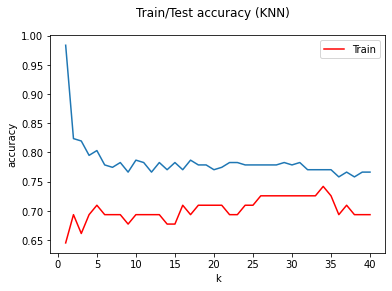

In [63]:
fig, ax1 = plt.subplots(1)
fig.suptitle("Train/Test accuracy (KNN)")
ax1.plot(k_list, train_accuracy, label="Train")
ax1.plot(k_list, test_accuracy, c='r', label="Test")
ax1.set(xlabel="k", ylabel="accuracy")
ax1.legend()
plt.show() #it is not needed for jupyter file

### Visulization for analysis and comparison

In [9]:
spec_ks = [1, 5, 20, 40]
pred_ys = {}
for k in spec_ks:
    knn_classifier = KNeighborsClassifier(n_neighbors = k, metric="euclidean")
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy_score(y_pred, y_test)
    pred_ys[k] = y_pred

In [55]:
#class 1 has color #0080ff(blue) and class 2 has color #ffbf00(orange).
def get_colors(pred_list):
    colors = []
    for y in pred_list:
        if y == 1:
            colors.append('#0080ff')
        else:
            colors.append('#ffbf00')
    return colors              

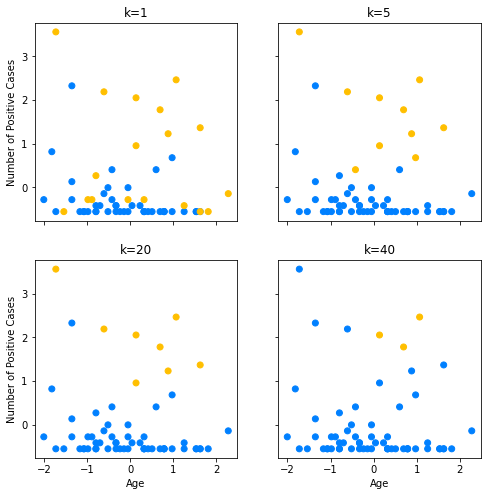

In [56]:
axs = plt.figure(figsize=(8,8)).subplots(2,2)
axs_list = [axs[i, j] for i in range(2) for j in range(2)]
for i in range(len(axs_list)):
    axs_list[i].scatter(X_test['Age'], X_test['Number_of_positive_cases'], c = get_colors(pred_ys[spec_ks[i]]))
    axs_list[i].set_title("k={0}".format(spec_ks[i]))
    axs_list[i].set(xlabel = "Age", ylabel = "Number of Positive Cases")
    axs_list[i].label_outer()
plt.show() #it is not needed for jupyter file


In [57]:
y_train.groupby(y_train).count()

Survival_status
1    181
2     63
Name: Survival_status, dtype: int64

### Tuning k using 5-Cross validation 

In [37]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': range(1,41)}
scroing = "accuracy"

knn_classifier_grid = KNeighborsClassifier(metric="euclidean")
knn_gridsearch = GridSearchCV(knn_classifier, param_grid = params, scoring=scroing)
knn_gridsearch.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=40),
             param_grid={'n_neighbors': range(1, 41)}, scoring='accuracy')

In [41]:
print("The best k is", knn_gridsearch.best_estimator_.get_params()['n_neighbors'])
print("accuracy score:", knn_gridsearch.best_score_)

The best k is 11
accuracy score: 0.7744047619047618


In [58]:
from sklearn.metrics import confusion_matrix, classification_report
knn_classifier11 = knn_gridsearch.best_estimator_
y_pred = knn_classifier11.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[39  5]
 [14  4]]
              precision    recall  f1-score   support

           1       0.74      0.89      0.80        44
           2       0.44      0.22      0.30        18

    accuracy                           0.69        62
   macro avg       0.59      0.55      0.55        62
weighted avg       0.65      0.69      0.66        62



In [45]:
# the best k is 34 according to Train/Testbecause the difference between accuracies is minimal at this point.
knn_classifier34 = KNeighborsClassifier(n_neighbors = 34, metric = "euclidean")
knn_classifier34.fit(X_train, y_train)
y_pred = knn_classifier34.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42  2]
 [14  4]]
              precision    recall  f1-score   support

           1       0.75      0.95      0.84        44
           2       0.67      0.22      0.33        18

    accuracy                           0.74        62
   macro avg       0.71      0.59      0.59        62
weighted avg       0.73      0.74      0.69        62



In [59]:
print("accuracy score of validation sets for Knn34:", knn_gridsearch.cv_results_['mean_test_score'][33])

accuracy score of validation sets for Knn34: 0.7457482993197279
